In [1]:
import tensorflow as tf
# from tensorboard.plugins.hparams import api as hp
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
ratings = pd.read_pickle("./Data/small_random_selection_longform.pkl")

In [4]:
user_enc = LabelEncoder()
ratings['user'] = user_enc.fit_transform(ratings['user_id'].values)
n_users = ratings['user'].nunique()
n_users

37235

In [5]:
item_enc = LabelEncoder()
ratings['movie'] = item_enc.fit_transform(ratings['movie_id'].values)
n_movies = ratings['movie'].nunique()
n_movies

29758

In [6]:
nmovie_id = ratings.movie_id.nunique()
nuser_id = ratings.user_id.nunique()

In [7]:
X_train, X_test = train_test_split(ratings[['movie', 'user', 'rating_score']], test_size=0.3, random_state=42)

In [8]:
len(X_train)

388607

In [9]:
l2_1 = keras.regularizers.l2(.1)
l2_01 = 'l2'
l2_001 = keras.regularizers.l2(.001)

In [10]:
HP_NUM_UNITS = [32, 64, 128]
HP_DROPOUT = [.3]
HP_LEARNING_RATE = [.1]
HP_REGULARIZER = [l2_1]

In [11]:
def train_test_model(hparams):
    
    input_movies = keras.layers.Input(shape=[1])
    embed_movies = keras.layers.Embedding(nmovie_id+1, 15)(input_movies)
    movies_out = keras.layers.Flatten()(embed_movies)

    input_users = keras.layers.Input(shape=[1])
    embed_users = keras.layers.Embedding(nuser_id+1, 15)(input_users)
    users_out = keras.layers.Flatten()(embed_users)

    conc_layer = keras.layers.Concatenate()([movies_out, users_out])
    x = keras.layers.Dense(hparams['HP_NUM_UNITS'], 
                           activation='relu', 
                           kernel_regularizer=hparams['HP_REGULARIZER'])(conc_layer)
    dropout = x = keras.layers.Dropout(rate=hparams['HP_DROPOUT'], seed=42)(x)
    x_out = x = keras.layers.Dense(1, 
                                   activation='relu',
                                  kernel_regularizer=hparams['HP_REGULARIZER'])(x)

    model = keras.Model([input_movies, input_users], x_out)
    
    opt = tf.optimizers.Adam(learning_rate=hparams['HP_LEARNING_RATE'])
    model.compile(optimizer=opt, loss='mean_squared_error', metrics = keras.metrics.RootMeanSquaredError())
    
    hist = model.fit([X_train.movie, X_train.user], 
                 X_train.rating_score,  
                 batch_size=len(X_train), epochs=100, validation_split=.2)

#     print(hist.history['val_mean_squared_error'])
    return hist

In [12]:
run_history = {}

session_num = 0

for num_units in HP_NUM_UNITS:
    for dropout_rate in HP_DROPOUT:
        for learning_rate in HP_LEARNING_RATE:
            for regularization in HP_REGULARIZER:
                hparams = {
                'HP_NUM_UNITS': num_units,
                'HP_DROPOUT': dropout_rate,
                'HP_LEARNING_RATE': learning_rate,
                'HP_REGULARIZER': regularization,
                }
                
                run_name = "run-{}".format(session_num)
                print("----Starting trial: {}".format(run_name))
                print(hparams)
                
                output = train_test_model(hparams,)
                run_history[run_name] = {
                    'params': hparams,
                    'output': output,
                }
                session_num += 1

----Starting trial: run-0
{'HP_NUM_UNITS': 32, 'HP_DROPOUT': 0.3, 'HP_LEARNING_RATE': 0.1, 'HP_REGULARIZER': <tensorflow.python.keras.regularizers.L2 object at 0x7ff294c10520>}
Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 18.6722 - root_mean_squared_error: 3.9282 - val_loss: 13.3649 - val_root_mean_squared_error: 3.4937
Epoch 2/100
1/1 [==============================] - 0s 435ms/step - loss: 13.3768 - root_mean_squared_error: 3.4954 - val_loss: 5.8372 - val_root_mean_squared_error: 2.2647
Epoch 3/100
1/1 [==============================] - 0s 495ms/step - loss: 5.8230 - root_mean_squared_error: 2.2616 - val_loss: 6.0205 - val_root_mean_squared_error: 2.1584
Epoch 4/100
1/1 [==============================] - 0s 410ms/step - loss: 7.1348 - root_mean_squared_error: 2.4027 - val_loss: 2.3148 - val_root_mean_squared_error: 1.0983
Epoch 5/100
1/1 [==============================] - 0s 398ms/step - loss: 2.7070 - root_mean_squared_error: 1.2643 - val_loss: 2.6197 - val_

Epoch 95/100
1/1 [==============================] - 0s 321ms/step - loss: 0.7617 - root_mean_squared_error: 0.8222 - val_loss: 0.8983 - val_root_mean_squared_error: 0.9012
Epoch 96/100
1/1 [==============================] - 0s 356ms/step - loss: 0.7607 - root_mean_squared_error: 0.8213 - val_loss: 0.8988 - val_root_mean_squared_error: 0.9014
Epoch 97/100
1/1 [==============================] - 0s 366ms/step - loss: 0.7582 - root_mean_squared_error: 0.8197 - val_loss: 0.8976 - val_root_mean_squared_error: 0.9011
Epoch 98/100
1/1 [==============================] - 0s 357ms/step - loss: 0.7570 - root_mean_squared_error: 0.8193 - val_loss: 0.8954 - val_root_mean_squared_error: 0.9005
Epoch 99/100
1/1 [==============================] - 0s 348ms/step - loss: 0.7562 - root_mean_squared_error: 0.8195 - val_loss: 0.8932 - val_root_mean_squared_error: 0.8999
Epoch 100/100
1/1 [==============================] - 0s 332ms/step - loss: 0.7542 - root_mean_squared_error: 0.8191 - val_loss: 0.8920 - val

Epoch 42/100
1/1 [==============================] - 1s 557ms/step - loss: 0.8010 - root_mean_squared_error: 0.8166 - val_loss: 0.9319 - val_root_mean_squared_error: 0.9001
Epoch 43/100
1/1 [==============================] - 0s 372ms/step - loss: 0.7776 - root_mean_squared_error: 0.8099 - val_loss: 0.9307 - val_root_mean_squared_error: 0.9047
Epoch 44/100
1/1 [==============================] - 0s 446ms/step - loss: 0.7851 - root_mean_squared_error: 0.8203 - val_loss: 0.9396 - val_root_mean_squared_error: 0.9099
Epoch 45/100
1/1 [==============================] - 0s 483ms/step - loss: 0.7868 - root_mean_squared_error: 0.8217 - val_loss: 0.9434 - val_root_mean_squared_error: 0.9082
Epoch 46/100
1/1 [==============================] - 0s 478ms/step - loss: 0.7708 - root_mean_squared_error: 0.8076 - val_loss: 0.9614 - val_root_mean_squared_error: 0.9146
Epoch 47/100
1/1 [==============================] - 0s 471ms/step - loss: 0.7749 - root_mean_squared_error: 0.8062 - val_loss: 0.9553 - val_

Epoch 90/100
1/1 [==============================] - 0s 472ms/step - loss: 0.7081 - root_mean_squared_error: 0.7891 - val_loss: 0.9035 - val_root_mean_squared_error: 0.9051
Epoch 91/100
1/1 [==============================] - 1s 507ms/step - loss: 0.7081 - root_mean_squared_error: 0.7898 - val_loss: 0.8994 - val_root_mean_squared_error: 0.9038
Epoch 92/100
1/1 [==============================] - 0s 482ms/step - loss: 0.7071 - root_mean_squared_error: 0.7902 - val_loss: 0.8988 - val_root_mean_squared_error: 0.9037
Epoch 93/100
1/1 [==============================] - 1s 519ms/step - loss: 0.7066 - root_mean_squared_error: 0.7902 - val_loss: 0.9019 - val_root_mean_squared_error: 0.9049
Epoch 94/100
1/1 [==============================] - 0s 447ms/step - loss: 0.7053 - root_mean_squared_error: 0.7889 - val_loss: 0.9031 - val_root_mean_squared_error: 0.9055
Epoch 95/100
1/1 [==============================] - 1s 545ms/step - loss: 0.7044 - root_mean_squared_error: 0.7882 - val_loss: 0.9004 - val_

Epoch 37/100
1/1 [==============================] - 1s 787ms/step - loss: 0.8363 - root_mean_squared_error: 0.8161 - val_loss: 1.0173 - val_root_mean_squared_error: 0.9241
Epoch 38/100
1/1 [==============================] - 1s 738ms/step - loss: 0.8379 - root_mean_squared_error: 0.8213 - val_loss: 0.9852 - val_root_mean_squared_error: 0.9061
Epoch 39/100
1/1 [==============================] - 1s 657ms/step - loss: 0.7886 - root_mean_squared_error: 0.7901 - val_loss: 1.0181 - val_root_mean_squared_error: 0.9253
Epoch 40/100
1/1 [==============================] - 1s 613ms/step - loss: 0.8197 - root_mean_squared_error: 0.8110 - val_loss: 0.9555 - val_root_mean_squared_error: 0.9014
Epoch 41/100
1/1 [==============================] - 1s 651ms/step - loss: 0.7826 - root_mean_squared_error: 0.7997 - val_loss: 0.9369 - val_root_mean_squared_error: 0.9013
Epoch 42/100
1/1 [==============================] - 1s 584ms/step - loss: 0.7921 - root_mean_squared_error: 0.8171 - val_loss: 0.9407 - val_

Epoch 85/100
1/1 [==============================] - 1s 685ms/step - loss: 0.6964 - root_mean_squared_error: 0.7765 - val_loss: 0.9057 - val_root_mean_squared_error: 0.9019
Epoch 86/100
1/1 [==============================] - 1s 692ms/step - loss: 0.6956 - root_mean_squared_error: 0.7768 - val_loss: 0.9109 - val_root_mean_squared_error: 0.9039
Epoch 87/100
1/1 [==============================] - 1s 682ms/step - loss: 0.6949 - root_mean_squared_error: 0.7753 - val_loss: 0.9123 - val_root_mean_squared_error: 0.9045
Epoch 88/100
1/1 [==============================] - 1s 683ms/step - loss: 0.6938 - root_mean_squared_error: 0.7744 - val_loss: 0.9046 - val_root_mean_squared_error: 0.9018
Epoch 89/100
1/1 [==============================] - 1s 668ms/step - loss: 0.6929 - root_mean_squared_error: 0.7755 - val_loss: 0.9020 - val_root_mean_squared_error: 0.9011
Epoch 90/100
1/1 [==============================] - 1s 658ms/step - loss: 0.6933 - root_mean_squared_error: 0.7767 - val_loss: 0.9083 - val_

In [13]:
import matplotlib.pyplot as plt

In [14]:
len(run_history.keys())

3

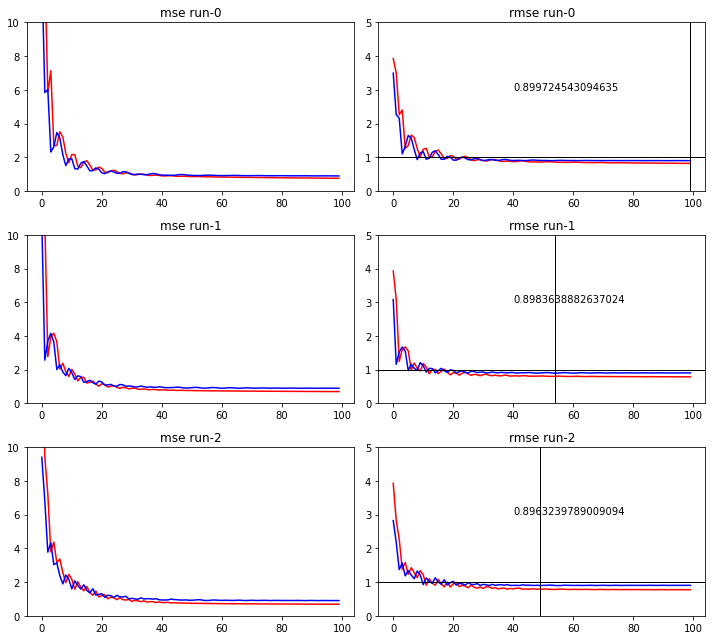

In [17]:
fig, axs = plt.subplots(ncols=2, nrows=len(run_history.keys()), figsize=(10, len(run_history.keys())*3))

for n, key in enumerate(run_history.keys()):
    axs[n,0].plot(run_history[key]['output'].history['loss'], color='r')
    axs[n,0].plot(run_history[key]['output'].history['val_loss'], color='b')
    
    axs[n,1].plot(run_history[key]['output'].history['root_mean_squared_error'], color='r')
    axs[n,1].plot(run_history[key]['output'].history['val_root_mean_squared_error'], color='b')
    axs[n,1].axvline(np.where(run_history[key]['output'].history['val_root_mean_squared_error']==np.min(run_history[key]['output'].history['val_root_mean_squared_error'])), 
                     color='k', lw=1)
    axs[n,1].annotate(str(np.min(run_history[key]['output'].history['val_root_mean_squared_error'])),
                        xy=(40,3),)
    
    title_str = '-'.join(str(run_history[key]['params'][param]) for param in run_history[key]['params'].keys())
    
    axs[n,0].set_title("mse {}".format(key))
    axs[n,1].set_title("rmse {}".format(key))
    
    axs[n,0].set_ylim(0,10)
    axs[n,1].set_ylim(0,5)
    
    axs[n, 1].axhline(1, color='k', lw=1)
    
plt.tight_layout()   
plt.show()

In [16]:
print(run_history['run-0'])
print(run_history['run-1'])
print(run_history['run-2'])

{'params': {'HP_NUM_UNITS': 32, 'HP_DROPOUT': 0.3, 'HP_LEARNING_RATE': 0.1, 'HP_REGULARIZER': <tensorflow.python.keras.regularizers.L2 object at 0x7ff294c10520>}, 'output': <tensorflow.python.keras.callbacks.History object at 0x7ff294788f70>}
{'params': {'HP_NUM_UNITS': 64, 'HP_DROPOUT': 0.3, 'HP_LEARNING_RATE': 0.1, 'HP_REGULARIZER': <tensorflow.python.keras.regularizers.L2 object at 0x7ff294c10520>}, 'output': <tensorflow.python.keras.callbacks.History object at 0x7ff2742c3e80>}
{'params': {'HP_NUM_UNITS': 128, 'HP_DROPOUT': 0.3, 'HP_LEARNING_RATE': 0.1, 'HP_REGULARIZER': <tensorflow.python.keras.regularizers.L2 object at 0x7ff294c10520>}, 'output': <tensorflow.python.keras.callbacks.History object at 0x7ff27432ef10>}


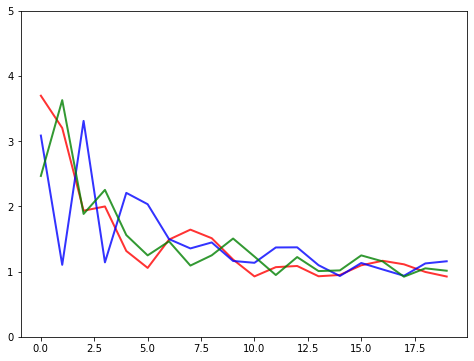

In [23]:
fig, ax = plt.subplots(figsize=(8,6))

colors = ['red', 'blue', 'green']
for n, key in enumerate(['run-0', 'run-3', 'run-6']):
    
    ax.plot(run_history[key]['output'].history['val_root_mean_squared_error'], color=colors[n], alpha=.8, lw=2)

ax.set_ylim(0,5)
plt.show()

{'params': {'HP_NUM_UNITS': 64,
  'HP_DROPOUT': 0.3,
  'HP_LEARNING_RATE': 0.1,
  'HP_REGULARIZER': <tensorflow.python.keras.regularizers.L2 at 0x7fc3be6db070>},
 'output': <tensorflow.python.keras.callbacks.History at 0x7fc3902b80d0>}

In [26]:
run_history['run-0']['params']['HP_REGULARIZER'].l2

array(0.1, dtype=float32)

In [27]:
run_history['run-1']

{'params': {'HP_NUM_UNITS': 64,
  'HP_DROPOUT': 0.3,
  'HP_LEARNING_RATE': 0.01,
  'HP_REGULARIZER': 'l2'},
 'output': <tensorflow.python.keras.callbacks.History at 0x7f4efc4fe4f0>}

In [28]:
run_history['run-1']['params']['HP_REGULARIZER'].l2

AttributeError: 'str' object has no attribute 'l2'

In [18]:
import json
def export_history(run_history, batch_size, n_epochs, save_path):
    history_dict = run_history.copy()
    for key in history_dict:
        if history_dict[key]['params']['HP_REGULARIZER']=='l2':
            
            history_dict[key]['params']['HP_REGULARIZER'] = .01
        else:
            try:
                history_dict[key]['params']['HP_REGULARIZER'] = history_dict[key]['params']['HP_REGULARIZER'].l2.tolist()
            except:
                pass   
        if type(history_dict[key]['params']['HP_REGULARIZER']) == np.ndarray:
            history_dict[key]['params']['HP_REGULARIZER'] = history_dict[key]['params']['HP_REGULARIZER'].tolist()
        history_dict[key]['params']['batch_size'] = batch_size
        history_dict[key]['params']['n_epochs'] = n_epochs
        
        try:
            history_dict[key]['output'] = history_dict[key]['output'].history
        except:
            history_dict[key]['output'] = history_dict[key]['output']
      
    with open(save_path, 'w') as f:
        json.dump(history_dict, f)
    
    return history_dict

new_dict = export_history(run_history, len(X_train), 100, "./run_history/model6.json")